<a href="https://www.kaggle.com/code/iqmansingh/mohs-hardness-starter-notebook?scriptVersionId=151880328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display:fill;
           background-color:#89B9AD88;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/mohs_hardness/mohs-banner.jpg">
    
<H1 style="padding: 20px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 36px;text-transform: uppercase;">Regression with Mohs Hardness Dataset</H1>
</div>

<h3 style="font-family:'Garamond', 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #303030; line-height: 1.6;">
Hi everyone! 🙋‍♂️<br> 
This is a simple starter notebook for this Playground Series (PS3E25). Feel free to 'Copy & Edit' the notebook and make your changes. <br>
Have fun!
</h3>


In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Da1. Dataset Overviewrk
sns.set_palette("viridis")
# sns.color_palette("flare")
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import optuna
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from catboost import Pool, CatBoostRegressor, cv

<div style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Table of Contents
    </h1>
</div>
<br>
<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 1. Dataset Overview </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 2. Baseline Modelling </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 2.1 Baseline RandomForest Model </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 2.2 Baseline CatBoost Model </a><br>
<a href="#4.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 2.3 Baseline LGBM Model </a><br>
<a href="#6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 3. Plotting Feature Importance </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 4. Creating Baseline 'submission.csv' </a><br>

<div id="1" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv", index_col="id")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv",index_col="id")
sample = pd.read_csv("/kaggle/input/playground-series-s3e25/sample_submission.csv")

In [3]:
train_data.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [5]:
train_data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


<div id="4" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Baseline Modelling
    </h1>
</div>

In [6]:
seed = np.random.seed(6)

X = train_data.drop(["Hardness"],axis=1)
y = train_data["Hardness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #263A29; font-weight: normal; font-size: 26px;">
   Evaluation Metric (Median Abs Error):
    </h1>
</div>
<br>
\begin{align}
MedAE (y,\hat{y}) = median(| y_i - \hat {y}_i |,...,| y_n - \hat {y}_n |)
\end{align}



<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   2.1 Baseline RandomForest Model
    </h1>
</div>
<hr>

In [7]:
rfmodel = RandomForestRegressor(random_state=seed)
rfmodel.fit(X,y)
print("CV MedAE of Baseline RF is",-1*cross_val_score(rfmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())

CV MedAE of Baseline RF is 0.6656250000000001


<div id="4.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   2.2 Baseline CatBoost Model
    </h1>
</div>
<hr>

In [8]:
catmodel = CatBoostRegressor(random_state=seed,verbose=0)
catmodel.fit(X,y)
print("CV MedAE of Baseline Cat is",-1*cross_val_score(catmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())

CV MedAE of Baseline Cat is 0.6578649883602484


<div id="4.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   2.3 Baseline LGBM Model
    </h1>
</div>
<hr>

In [9]:
lgbmmodel = LGBMRegressor(random_state=seed)
lgbmmodel.fit(X,y)
print("CV MedAE of Baseline LGBM is",-1*cross_val_score(lgbmmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())

CV MedAE of Baseline LGBM is 0.6359501209824175


<div id="6" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Plotting Feature Importance
    </h1>
</div>

In [10]:
history = pd.DataFrame()
def plotImportance(modelName,model):
    history["cols"] = X_test.columns
    history["imp"] = model.feature_importances_
    history.sort_values("imp",inplace=True,ascending=False)
    history.reset_index(drop=True)
    plt.figure(figsize=(15,5))
    sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
    plt.title("Feature Imporance of "+modelName)

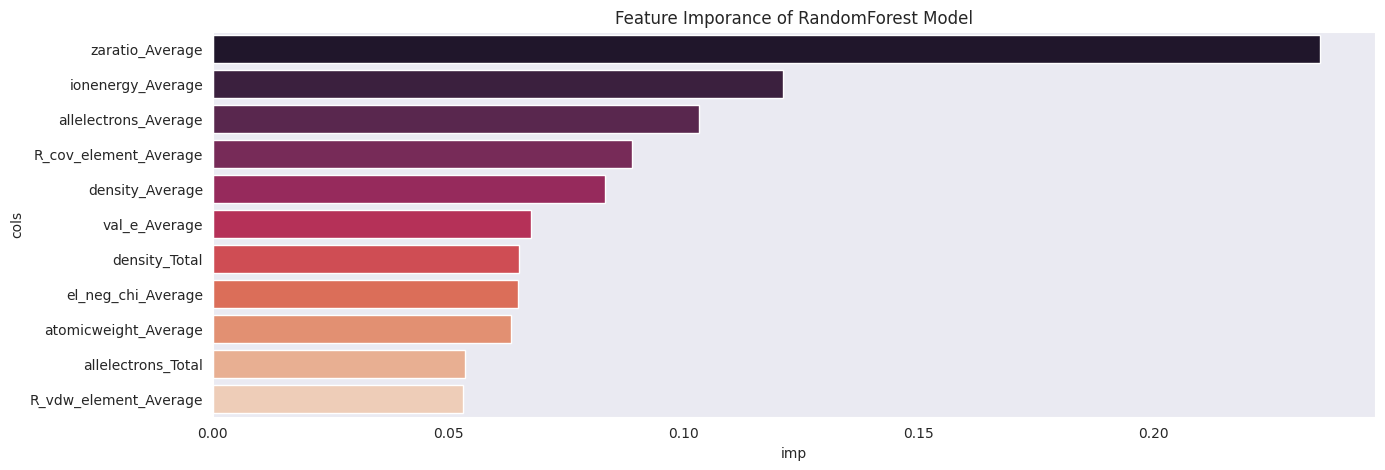

In [11]:
plotImportance("RandomForest Model",rfmodel)

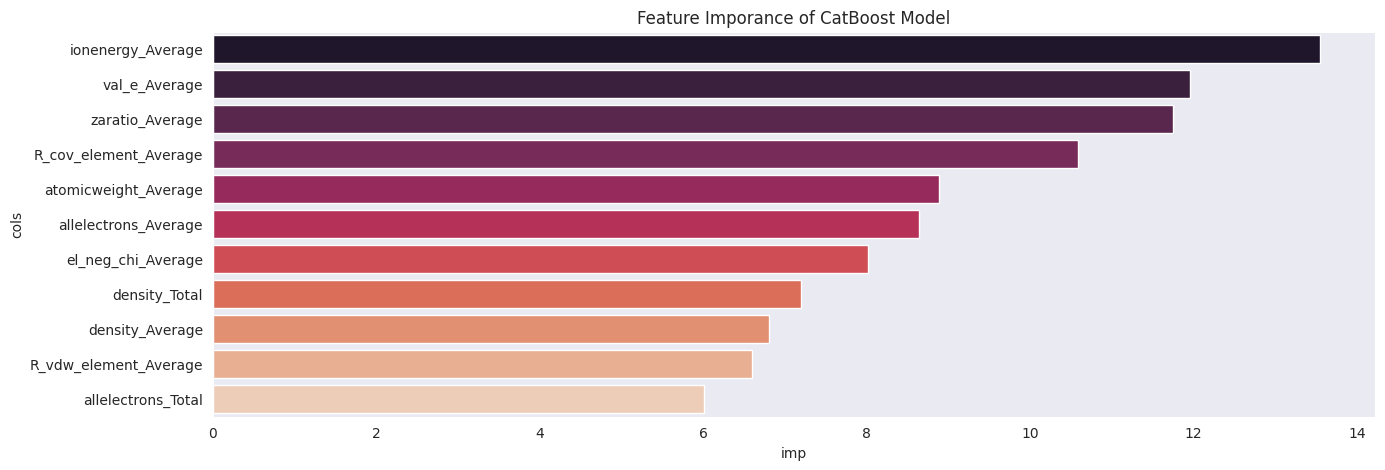

In [12]:
plotImportance("CatBoost Model",catmodel)

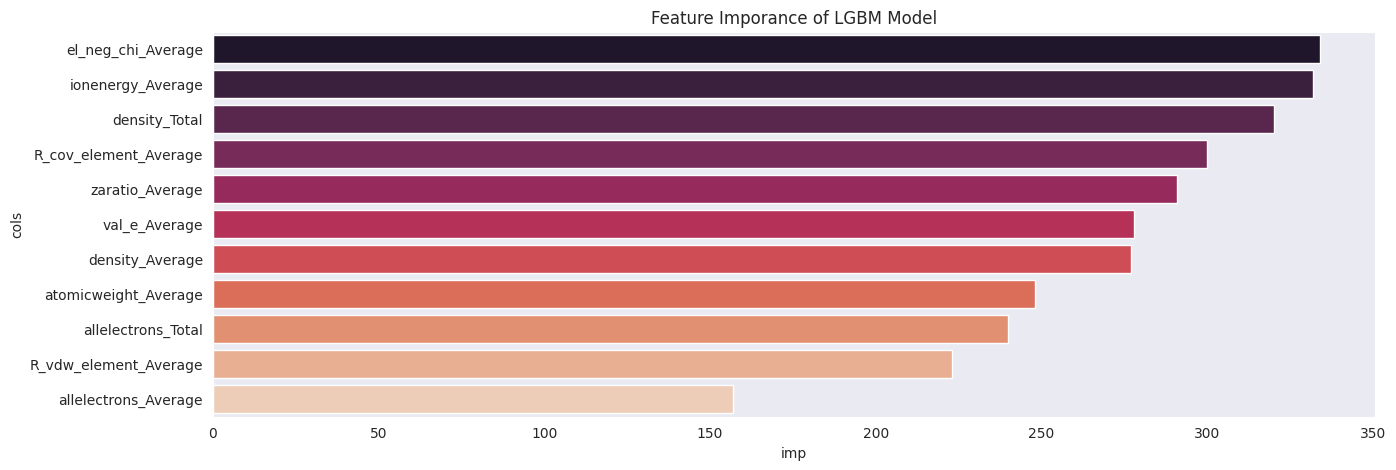

In [13]:
plotImportance("LGBM Model",lgbmmodel)

<div id="7" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Creating Baseline 'submission.csv'
    </h1>
</div>

In [14]:
rf_preds = rfmodel.predict(test_data)
cat_preds = catmodel.predict(test_data)
lgbm_preds = lgbmmodel.predict(test_data)

preds = (rf_preds + cat_preds + lgbm_preds)/3

In [15]:
sample["Hardness"] = preds

In [16]:
sample.to_csv("submission.csv",index=False,header=True)